<a href="https://colab.research.google.com/github/Fawall/Heart-Prediction/blob/main/tratamento_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
datas = pd.read_csv('/content/drive/MyDrive/Machine Learning/heart.csv', sep=',',encoding="utf-8")

## Exploração dos dados

In [3]:
datas.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
datas.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [5]:
datas.shape

(918, 12)

### Idades

O método ``` value_counts() ``` tem como objetivo contar a quantidade de vezes que um valor apareceu.

Já o método ``` sort_index()``` tem como função, ordenar a colunas tanto em ordem crescente, quanto descrescente.



In [6]:
datas['Age'].value_counts().sort_index()

,count
Age,
28,1
29,3
30,1
31,2
32,5
33,2
34,7
35,11
36,6


In [7]:
import plotly.express as px

In [8]:
histog = px.histogram(datas, x="Age", nbins = 60)
histog.update_layout(width=800,height=500, title_text="Distribuição das idades")
histog.show()

In [9]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='Count'>

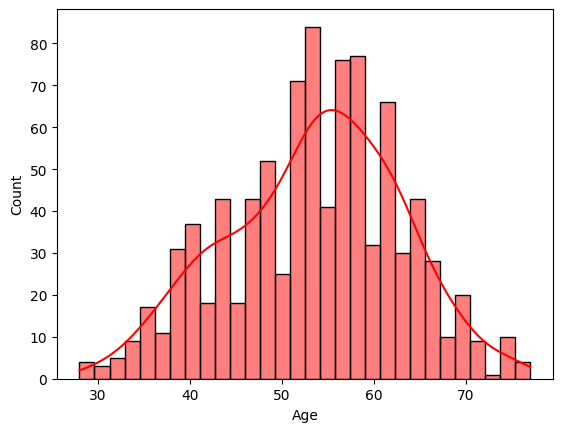

In [10]:
sns.histplot(datas, x="Age", bins=30, color="red", kde=True, stat="count")

### Sexo

In [11]:
datas['Sex'].value_counts()

,count
Sex,
M,725
F,193


<Axes: xlabel='Sex', ylabel='count'>

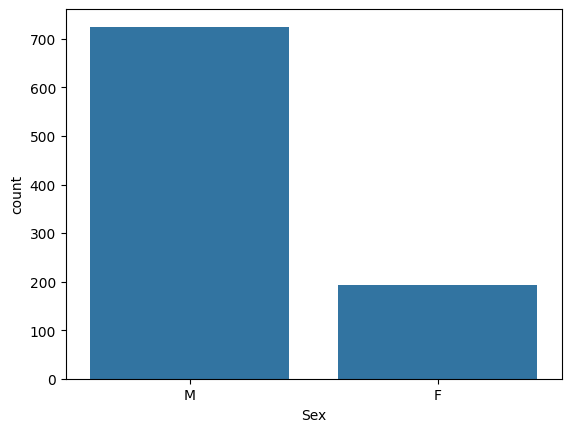

In [12]:
sns.countplot(x='Sex', data=datas )

In [13]:
datas.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Chest Pain Type = tipo de dores no peito

In [14]:
datas['ChestPainType'].value_counts()

,count
ChestPainType,
ASY,496
NAP,203
ATA,173
TA,46


ASY: assintomático\
NAP: dor não anginosa\
ATA: angina atípica\
Angina: Dor no peito causada pela diminuição do fluxo de sangue no coração

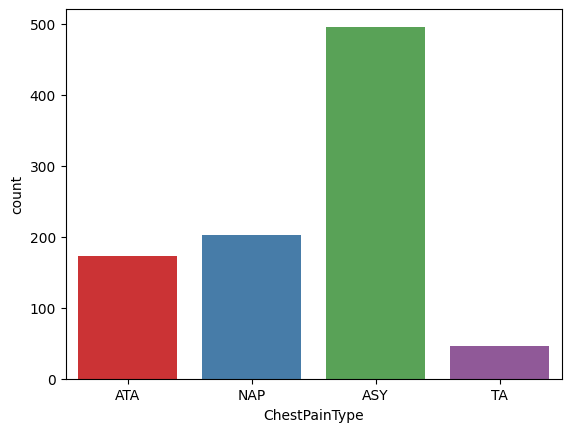

In [15]:
sns.countplot(x="ChestPainType", data=datas,palette="Set1",hue="ChestPainType");


## RestingBP (blood pressure) = pressão sanguínea em repouso em mmHG (sistólica)

In [16]:
datas["RestingBP"].value_counts().sort_index()

,count
RestingBP,
0,1
80,1
92,1
94,2
95,6
...,...
180,12
185,1
190,2


<Axes: xlabel='RestingBP', ylabel='Count'>

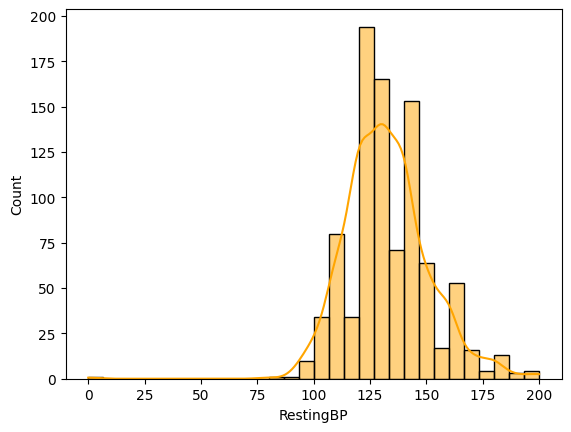

In [17]:
sns.histplot(datas, x="RestingBP", bins=30, color="orange", kde=True, stat="count" )

## Cholesterol  = Colesterol (mg/dl)

In [18]:
datas["Cholesterol"].value_counts().sort_index()

,count
Cholesterol,
0,172
85,1
100,2
110,1
113,1
...,...
491,1
518,1
529,1


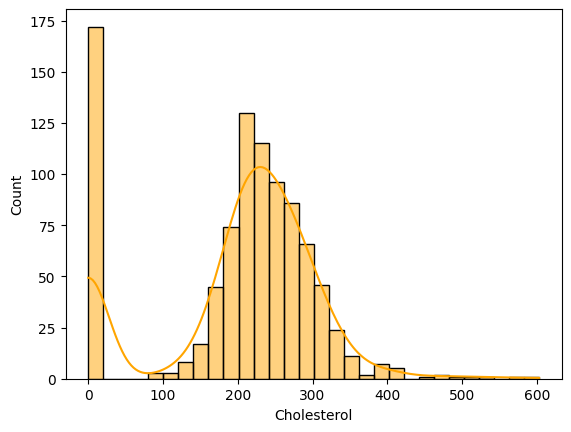

In [19]:
sns.histplot(datas, x="Cholesterol", bins=30, color="orange", kde=True, stat="count");

##FastingBS (blood sugar) = açúcar no sangue em jejum (mg/dl)

In [20]:
datas["FastingBS"].value_counts()

,count
FastingBS,
0,704
1,214


0: Fasting BS < 120 mg/dl (não diabético)\
1: Fasting BS >= 120 mg/dl (diabético)



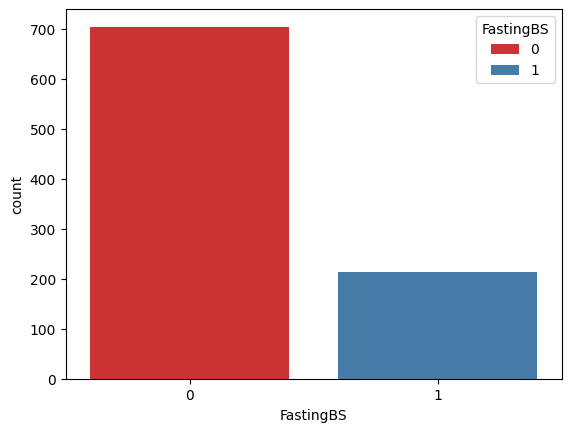

In [22]:
sns.countplot(x="FastingBS", data=datas,hue="FastingBS", palette="Set1");

##RestingECG = Eletrocardiograma em repouso

In [31]:
datas["RestingECG"].value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


Normal: Normal \
LVH: Hipertrofia ventricular esquerda \
ST: Anormalidade da onda ST-T \


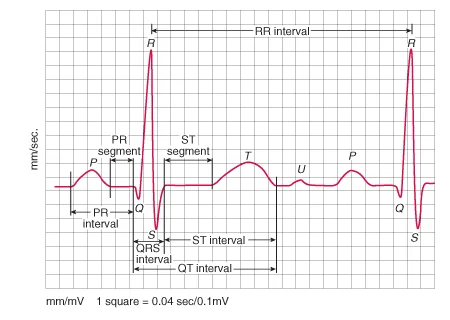

**Segmento ST:** qualquer desnível do segmento ST, para cima (supradesnível) ou para baixo (infradesnível), deve ser avaliado pois, pode corresponder a um infarto agudo do miocárdio

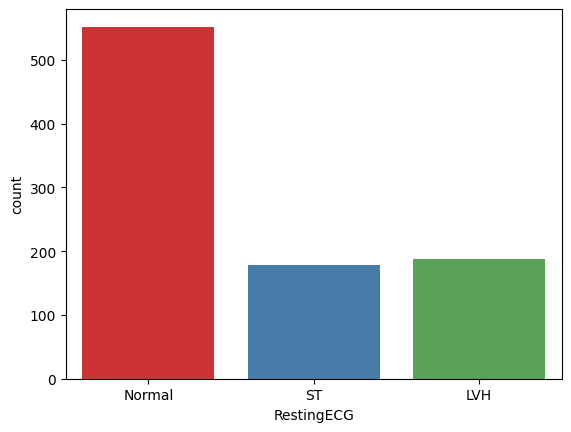

In [34]:
sns.countplot(x="RestingECG", data=datas, hue="RestingECG", palette="Set1");